Gradient Norm on sin(5*pi*x)/(5*pi*x)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
X = torch.linspace(-1,1,200).reshape(-1,1)
y=(np.sin(5*(np.pi*X)))/((5*(np.pi*X)))

In [ ]:
class Model(nn.Module):
    def __init__(self, inp=1, h2=5, h3=15,h4=15,h5=15,h6=15,h7=15,h8=5, outp=1):
        super().__init__()
        self.fc1 = nn.Linear(inp,h2)    
        self.fc2 = nn.Linear(h2, h3)
        self.fc3 = nn.Linear(h3, h4)
        self.fc4 = nn.Linear(h4, h5)
        self.fc5 = nn.Linear(h5, h6)
        self.fc6 = nn.Linear(h6, h7)
        self.fc7 = nn.Linear(h7, h8)
        self.out = nn.Linear(h8, outp)
        self.dropout = nn.Dropout(0.2)  

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        x = F.relu(self.fc4(x))
        x = self.dropout(x)
        x = F.relu(self.fc5(x))
        x = self.dropout(x)
        x = F.relu(self.fc6(x))
        x = self.dropout(x)
        x = F.relu(self.fc7(x))
        x = self.dropout(x)
        x = self.out(x)
        return x


In [ ]:
model = Model()
CriterionLoss = nn.MSELoss()
optim = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 2000
losses = []
grad_norm_list = []

for i in range(epochs):
    i += 1
    # feed forwarding
    y_pred = model.forward(X)
    
    # calculate loss
    tloss = CriterionLoss(y_pred, y)
    losses.append(tloss)
    
    optim.zero_grad()
    tloss.backward()
    
    optim.step()
    
    # Get gradient norm (From slides)
    grad_all = 0.0
    for p in model.parameters():
        grad = 0.0
        if p.grad is not None:
            grad = (p.grad.cpu().data.numpy() ** 2).sum()
        grad_all += grad
    grad_norm = grad_all ** 0.5
    grad_norm_list.append(grad_norm)
    
    # Print loss every 100 epochs
    if i % 100 == 0:
        print(f'Epoch: {i}, Loss: {tloss.item()}, Gradient Norm: {grad_norm}')


Epoch: 100, Loss: 0.08412808179855347, Gradient Norm: 0.017314995482675767
Epoch: 200, Loss: 0.06687755882740021, Gradient Norm: 0.04545248991341387
Epoch: 300, Loss: 0.03885643184185028, Gradient Norm: 0.05674238503334402
Epoch: 400, Loss: 0.03657867759466171, Gradient Norm: 0.12020337207995294
Epoch: 500, Loss: 0.030078131705522537, Gradient Norm: 0.1249890404940263
Epoch: 600, Loss: 0.025911984965205193, Gradient Norm: 0.15187634826743585
Epoch: 700, Loss: 0.035381194204092026, Gradient Norm: 0.11897352673580289
Epoch: 800, Loss: 0.025408193469047546, Gradient Norm: 0.16393702500587748
Epoch: 900, Loss: 0.034029845148324966, Gradient Norm: 0.15714851591429005
Epoch: 1000, Loss: 0.025066416710615158, Gradient Norm: 0.22531614945959752
Epoch: 1100, Loss: 0.035567447543144226, Gradient Norm: 0.10512056580044447
Epoch: 1200, Loss: 0.03713627904653549, Gradient Norm: 0.18515908855670973
Epoch: 1300, Loss: 0.022375650703907013, Gradient Norm: 0.31579691981051183
Epoch: 1400, Loss: 0.02746

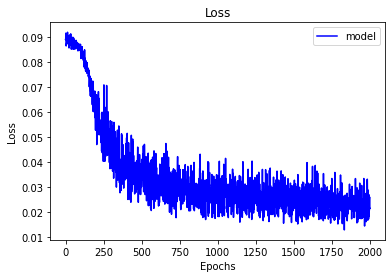

In [ ]:
losses=torch.tensor(losses)
plt.plot(range(epochs), losses.numpy(), 'b', label='model')
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()

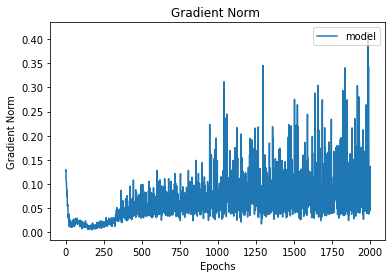

In [ ]:
#Gradient norm to iterations
plt.plot(range(epochs), grad_norm_list,label='model')
plt.title("Gradient Norm ")
plt.xlabel("Epochs")
plt.ylabel("Gradient Norm")
plt.legend(loc="upper right")
plt.show()

Gradient Norm on MNIST Dataset


In [ ]:
import torch
import torchvision
import pandas as pd
from torchsummary import summary
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from torchvision import transforms,datasets

In [ ]:
train=datasets.MNIST("",train=True,download=True,transform=transforms.Compose([transforms.ToTensor()]))
test=datasets.MNIST("",train=False,download=True,transform=transforms.Compose([transforms.ToTensor()]))

In [ ]:
trainset=torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset=torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 16)
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, 10)
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)
        
net = Net()
optimizer = optim.Adam(net.parameters(), lr=0.001)
losses = []
train_counter = []
num_epochs = 5
count = 0
norm_list = []

for epoch in range(num_epochs):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28 * 28))
        loss = F.nll_loss(output, y)
        losses.append(loss)
        loss.backward()
        total_norm = 0
        for p in net.parameters():
            param_norm = p.grad.data.norm(2)
            total_norm += param_norm.item() ** 2
        total_norm = total_norm ** (1. / 2)
        norm_list.append(total_norm)
        optimizer.step()
        train_counter.append((count * 64) + ((epoch - 1) * len(trainset.dataset)))
        count += 1


In [ ]:
losses=torch.tensor(losses)

Text(0.5, 0, 'Epochs')

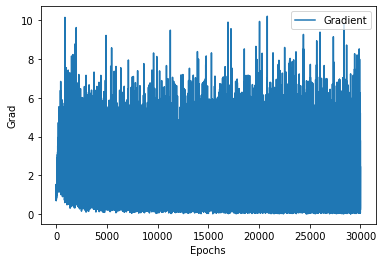

In [ ]:
import matplotlib.pyplot as plt
plt.plot(norm_list,label='Gradient')
plt.legend()
plt.ylabel('Grad')
plt.xlabel('Epochs')

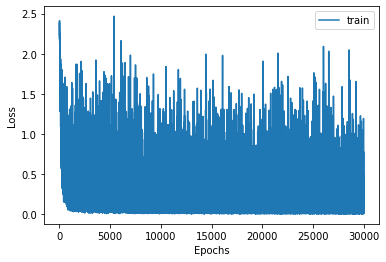

In [ ]:
plt.plot(losses,label='train')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()